Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Senna Renting"
STUDENT_NUMBER = "s1067489"
COLLABORATOR_NAME = ""
COLLABORATOR_STUDENT_NUMBER = ""

---

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) **named as follows**: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Roel] at `Roel.Bouman@ru.nl`
+ Do not remove any cells in the notebook, else this might break the auto-grading system. **An invalid notebook will mean a severe reduction in your grade!**
+ Many online collaboration platforms remove metadata from notebooks, which breaks the auto-grading system. Again, **An invalid notebook will mean a severe reduction in your grade!**. Should you wish to use these platforms, copy the answers from the online notebook to one running on your own machine with Anaconda, and then execute all cells.
+ Only type your answers in those places where they are asked.
+ Remove any "raise NotImplementedError()" statements in the cells you answered.

# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts from the toolbox folder. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

4.1.1a (0.5 point) Load the `synth1` data into python using the `loadmat` function. The `synth1` data is a Matfile loaded into Python as a dictionary; the relevant data is contained under keys `X` and `y`. Cluster the data into `K = 4` clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided `clusterPlot()` function from the toolbox. Move the legend if the position is obfuscating data.

**Helpful hints:**
 + In Python, you can use the function `KMeans()` from the package sklearn.cluster to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.
 + Type `clusterPlot(X,clusters,centroids,y)` to plot the data and the clustering. Don't forget to import the function from the `toolbox` folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.

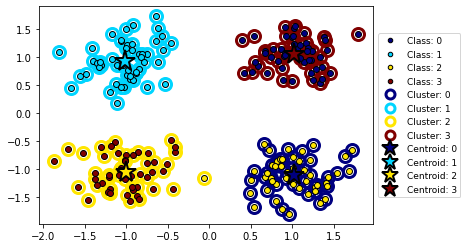

In [2]:
##Answer to question 4.1.1a
from toolbox.clusterVal import clusterVal
from toolbox.clusterPlot import clusterPlot
from scipy.io import loadmat
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

# fix KMEANS bug
NUM_THREADS = "1"

os.environ["OMP_NUM_THREADS"] = NUM_THREADS
os.environ["OPENBLAS_NUM_THREADS"] = NUM_THREADS
os.environ["MKL_NUM_THREADS"] = NUM_THREADS
os.environ["VECLIB_MAXIMUM_THREADS"] = NUM_THREADS
os.environ["NUMEXPR_NUM_THREADS"] = NUM_THREADS

# Code here
data = loadmat("./data/synth1")
X = data["X"]
y = data["y"]
kmn = KMeans(n_clusters=4)
kmn.fit(X)
plt.figure()
clusterPlot(X, kmn.labels_, kmn.cluster_centers_, y);
plt.show()

> 4.1.1b (0.5 point) Repeat the previous exercise. Cluster and plot the data sets *synth2*, *synth3*, and *synth4* with $k=4$. 

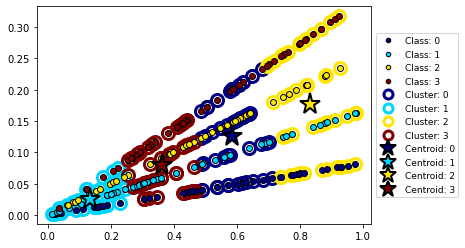

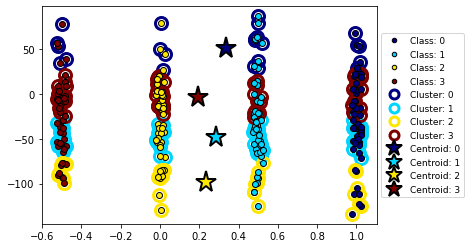

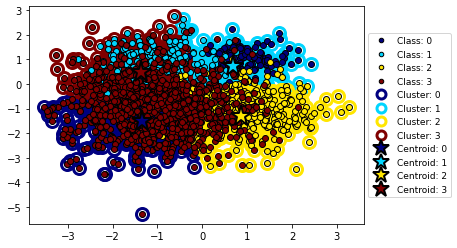

In [3]:
##Answer to question 4.1.1b
# Synth 2,3 and 4 fit and plotting code
filenames = ["synth2", "synth3", "synth4"]
for filename in filenames:
    data = loadmat(f"./data/{filename}")
    X = data["X"]
    y = data["y"]
    kmn.fit(X)
    plt.figure()
    clusterPlot(X, kmn.labels_, kmn.cluster_centers_, y)
    plt.show()

> 4.1.1c Does the clustering coincide with the true class? Explain for each of the four datasets.

**Answer:** For the first dataset, yes, but for the others k-means does a bad job at correctly classifying the clusters. This is mostly because the clusters are density based, and they are not really globular or well seperated. This causes k-means to converge to clusters which aren't the real clusters. For the other three clusters it would have therefore been better had we 

Evaluating how good your clustering is can be hard, because we don't always have labels. Generally, clustering is **unsupervised**.
If we do however have labels, we can use the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Perform `k`-means clustering for $k = 1, ..., 10$ clusters on each of the datasets. For each value of `k` compute the four cluster validity measures mentioned above. For each dataset: plot the calculated cluster validity measures as a function of `k`. Add a legend to each figure in order to indicate which measures are plotted in which colour.

**Helpful hints:**
 + Use the `clusterVal` function to compute the cluster validity. Don't forget to import it from the `toolbox folder`. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.
 + Labels for a legend are most easily generated by calling `plt.plot` multiple times before calling `plt.show`. You can set the `label` argument in each `plt.plot` to the name of the label (e.g. what you're plotting). Read the documentation in case you are uncertain!

C:\Users\Senna Renting\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


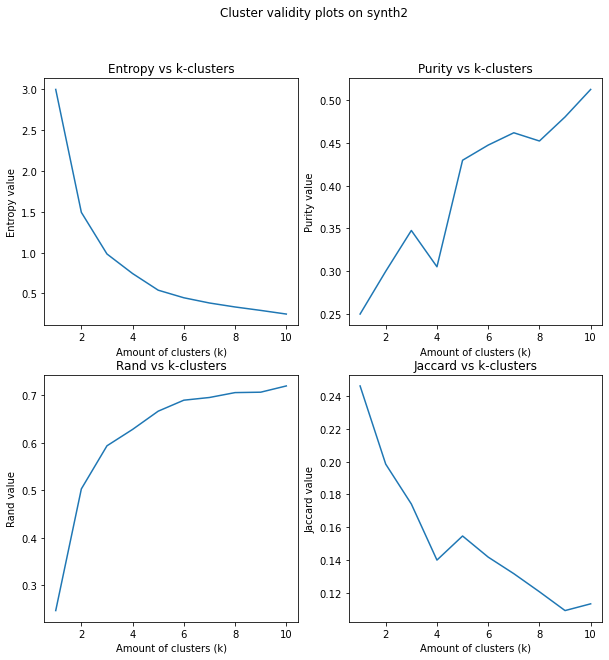

C:\Users\Senna Renting\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


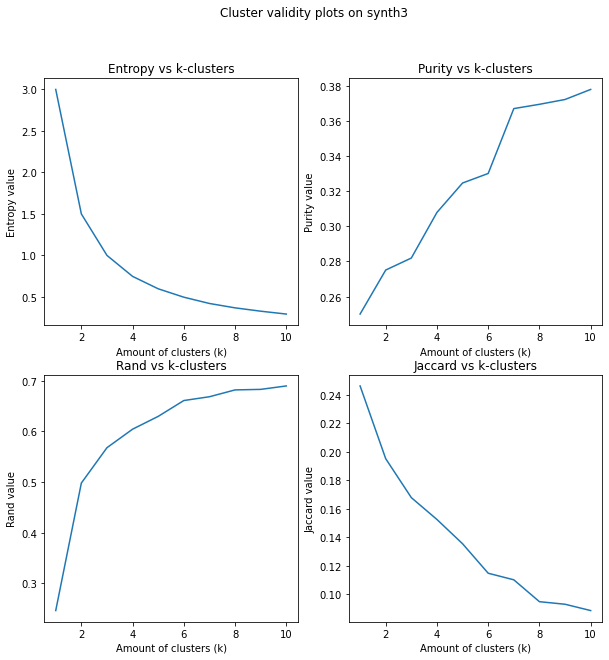

C:\Users\Senna Renting\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


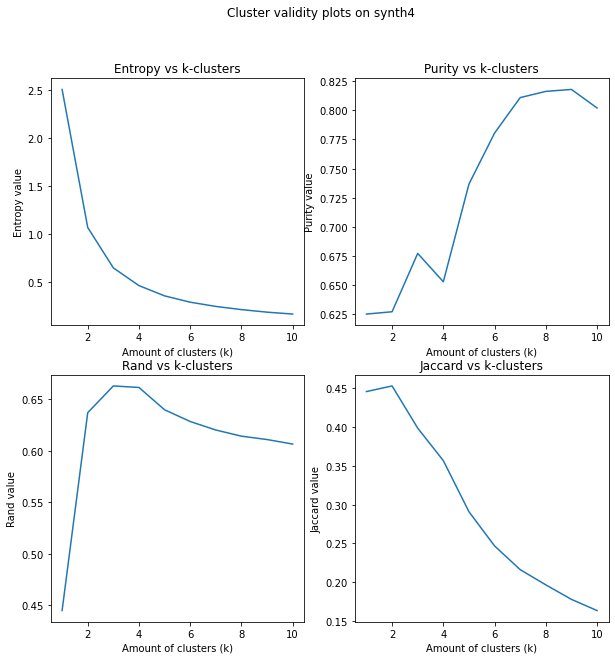

C:\Users\Senna Renting\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


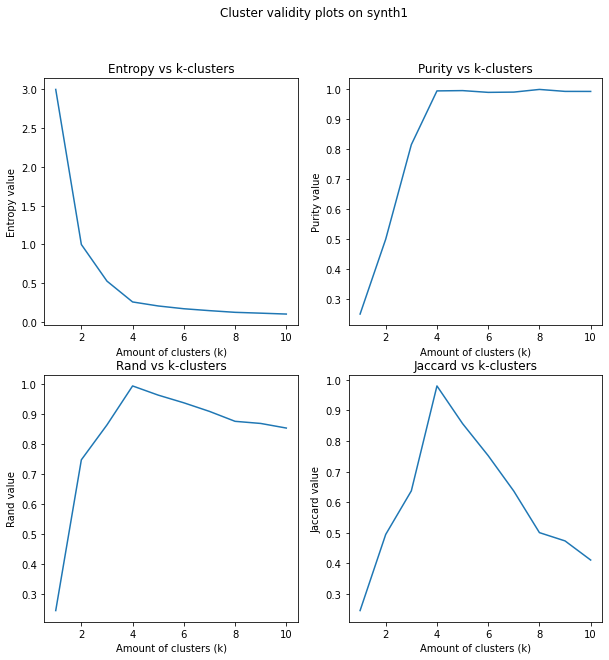

In [12]:
# YOUR CODE HERE
all_filenames = filenames.copy()
all_filenames.append("synth1")
for filename in all_filenames:
    Es = list()
    Ps = list()
    Rs = list()
    Js = list()
    ks = list(range(1,11))
    for k in ks:
        kmns = KMeans(n_clusters=k, init="k-means++")
        data = loadmat(f"./data/{filename}")
        X = data["X"]
        y = data["y"]
        kmns.fit(X)
        E,P,R,J = clusterVal(y, kmns.labels_)
        Es.append(E)
        Ps.append(P)
        Rs.append(R)
        Js.append(J)
        #print(f"{filename}'s validity for {k} clusters")
        #print(f"Entropy: {E}, Purity: {P}, Rand: {R}, Jaccard: {J}")
    # plot the entropy vs k-clusters
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    fig.suptitle(f"Cluster validity plots on {filename}")
    axs[0][0].set_title("Entropy vs k-clusters")
    axs[0][0].set_ylabel("Entropy value")
    axs[0][0].set_xlabel("Amount of clusters (k)")
    axs[0][0].plot(ks, Es)
    # plot the purity vs k-clusters
    axs[0][1].set_title("Purity vs k-clusters")
    axs[0][1].set_ylabel("Purity value")
    axs[0][1].set_xlabel("Amount of clusters (k)")
    axs[0][1].plot(ks, Ps)
    # plot the rand vs k-clusters
    axs[1][0].set_title("Rand vs k-clusters")
    axs[1][0].set_ylabel("Rand value")
    axs[1][0].set_xlabel("Amount of clusters (k)")
    axs[1][0].plot(ks, Rs)
    # plot the jaccard vs k-clusters
    axs[1][1].set_title("Jaccard vs k-clusters")
    axs[1][1].set_ylabel("Jaccard value")
    axs[1][1].set_xlabel("Amount of clusters (k)")
    axs[1][1].plot(ks, Js)
    plt.show()

> 4.1.2b (1.5 points) How can the cluster validity measures be used to select the best number of clusters?

> What happens when more than four clusters are used to model the data? Explain for each dataset.

**Answer:** To get the best number of clusters, you can just look at the maximum or the minimum of the validity measures, depending on the measure that was used. We have two types of validity checks, one for the classification accuracy, and the other type is for checking similarity: 
1. For example for entropy we want the value to be as small as possible, whereas for purity we want the opposite (as high as possible!). This then gives you the highest classification success, if you were to use that amount of clusters.
2. For the jaccard measure and the rand index we also want the maximum, since those represent the most similar mappings of the k-means algorithm.

From the plots we can see that there are indeed some conflicts, because the similarity measures quickly reach their maximum, at around k=4, but the purity and entropy measures appear to decline forever. This is an overfitting example. We want to choose the optimum value for k with respect to all the validity measures so we don't overfit. The similarity measures are the best indicators that tell us when to stop increasing the amount of clusters.

So in short for more than four clusters, there seems to be some overfitting happening when the k-means algorithm is trained on the data.

## 4.2 Practical applications of k-means

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by the centroid of the corresponding cluster. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.2.1 (1 point) We will take another look at the MNIST digits data. Load the  data, `data/digits.mat` using the `loadmat` function. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a grayscale $16 \times 16$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.

**Helpful hint:**
+ You can plot an image by the command `imshow(np.reshape(X[k,:],(x,y)))` which reshapes an image vector to a 2-dimensional array and plots it. You can plot the cluster centroids in a similar manner.
+ After fitting the KMeans object you made has an attribute containing the centroids (cluster centers). Read the documentation to find out how to access them.


In [5]:
##Answer to question 4.2.1a
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

> 4.2.2 (1 point) How well is the data represented by the cluster centroids? Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

In [ ]:
##Answer to question 4.2.2
#If you need it, you can write code here to help answer question 4.2.2, do not change your code for 4.2.1!

# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## 4.3 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. The function `linkage` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function`fcluster` extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.3.1a (1 point) Load the data set from `data/synth1`. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function `linkage` computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. TRead the online documentation to learn how to use it.
+ You can e.g. type `Z = linkage(X, method='single', metric='euclidean')` to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function `fcluster`. For example, type `cls = fcluster(Z, criterion='maxclust', t=4)` to get a maximum of 4 clusters. Type `help(fcluster)` (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the `dendrogram` function. You can make the visualization prettier by choosing an appropriate `color_threshold` to visually obtain 4 cluster. Note that this change in visualization does not impact the actual amount of clusters obtained by using the `fcluster` function.
+ Again, you can use the function `clusterPlot` to plot a scatter plot of the clustering.

In [ ]:
##Answer to question 4.3.1a
# YOUR CODE HERE
raise NotImplementedError()

> 4.3.1b (1 point) Change the linkage methods (single, complete, average) for the `synth1` dataset and **explain** how this changes the dendrogram (plot all 3 dendrograms) and make a scatterplot of the best performing method. Argue why you think this linkage method performs best. If several linkage methods perform similarly, describe why. Repeat this exercise for the `synth2`, `synth3`, and `synth4` datasets. 

In [ ]:
##Answer to question 4.3.1b
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

## 4.4 Improving hierarchical clustering
### 4.4.1 Preprocessing and parameter tuning
In the previous exercise we observed that the hierarchical clustering results we obtained have room for improvement. In this exercise, you will think about how we can best improve our clustering result, using preprocessing and/or parameter tuning. 
> 4.4.1 (2 points) What combination of preprocessing, distance measures and linkage gives you the best improvement (if any)? Make plots of the best clustering you obtained. Do this for all 4 datasets. Explain why you chose a certain combination. **Try to reason what is best based on the plots in the previous exercise. Trying all options is too time-consuming!** In every case, you should have 4 clusters.

To narrow down the search space, you should only consider the following options:
+ Preprocessing:
    + No preprocessing
    + Mean-centering
    + Standardization
+ Distance measures:
    + Euclidean
    + Manhattan
    + Cosine
+ Linkage
    + Single
    + Average
    + Complete

In [ ]:
##Answer to question 4.4.1
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE